In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import seaborn as sns
%matplotlib inline

In [2]:
#create a connection to the database and print the connection to verify that it works
mydb = mysql.connector.connect(
  host="remotemysql.com",
  user="LUmOsZxti8",
  password="R7XnDtRsy9"
)

In [3]:
#download accelerometer data into csv
sql_query_acc = pd.read_sql_query(''' select * from LUmOsZxti8.Accelerometer''',mydb)
df_acc = pd.DataFrame(sql_query_acc)
df_acc.columns = ['session_id', 'timestamp','entry_number', 'accX', 'accY', 'accZ','identifier']
df_acc.to_csv (r'db_data_acc.csv', index = False) # place 'r' before the path name to avoid any errors in the path

#download gyroscope data into csv
sql_query_gyro = pd.read_sql_query(''' select * from LUmOsZxti8.Gyroscope''',mydb)
df_gyro = pd.DataFrame(sql_query_gyro)
df_gyro.columns = ['session_id', 'timestamp','entry_number', 'gyroX', 'gyroY', 'gyroZ','identifier']
df_gyro.to_csv (r'db_data_gyro.csv', index = False) # place 'r' before the path name to avoid any errors in the path

In [4]:
df_acc.drop([ 'identifier' ], axis= 1, inplace = True) #remove identifier columns from accelerometer df
df_gyro.drop(['session_id', 'timestamp','entry_number'], axis= 1, inplace = True) #remove session_id & timestamp columns from gyroscope df

In [5]:
#join the two dataframes (accelerometer & gyroscope data)
out = df_acc.join(df_gyro) 
index = out.index
number_of_rows = len(index)
#print(number_of_rows) # Print out the number of rows

In [6]:
#write the joined dataframes into a csv file
with open(r'all_sensor_data.csv', 'w', encoding='utf-8') as f: out.to_csv(f, index=False)

In [7]:
#read and print csv file to verify that the operation was ok
df_all_data = pd.read_csv("all_sensor_data.csv")
df_all_data

,session_id,timestamp,entry_number,accX,accY,accZ,gyroX,gyroY,gyroZ,identifier
0,1,2021-04-30T14:13:04.386,0,0.0,0.0,2.0,-4.0,0.0,-3.0,1
1,1,2021-04-30T14:13:04.565,1,0.0,0.0,2.0,-11.0,-1.0,-3.0,1
2,1,2021-04-30T14:13:04.753,2,1.0,0.0,2.0,-41.0,-16.0,121.0,1
3,1,2021-04-30T14:13:04.922,3,1.0,1.0,3.0,-237.0,-173.0,266.0,1
4,1,2021-04-30T14:13:05.117,4,1.0,1.0,2.0,-223.0,-267.0,684.0,1
...,...,...,...,...,...,...,...,...,...,...
41277,18,2021-05-06T20:37:56.123,1384,1.0,1.0,2.0,112.0,126.0,150.0,6
41278,18,2021-05-06T20:37:56.345,1385,1.0,1.0,2.0,127.0,130.0,152.0,6
41279,18,2021-05-06T20:37:56.563,1386,1.0,1.0,3.0,130.0,128.0,149.0,6
41280,18,2021-05-06T20:37:56.786,1387,1.0,1.0,2.0,125.0,128.0,148.0,6


In [8]:
new_data = df_all_data.iloc[34357:41282,:] #Session ID 13 until 18

In [9]:
#write the joined dataframes into a csv file
with open(r'new_data.csv', 'w', encoding='utf-8') as f: new_data.to_csv(f, index=False)

In [10]:
#read and print csv file to verify that the operation was ok
punches = pd.read_csv("new_data.csv")
punches

,session_id,timestamp,entry_number,accX,accY,accZ,gyroX,gyroY,gyroZ,identifier
0,13,2021-05-06T19:49:40.501,1,1.0,0.0,3.0,136.0,132.0,151.0,1
1,13,2021-05-06T19:49:40.788,2,1.0,0.0,2.0,126.0,131.0,147.0,1
2,13,2021-05-06T19:49:41.078,3,2.0,0.0,3.0,146.0,141.0,132.0,1
3,13,2021-05-06T19:49:41.367,4,1.0,0.0,3.0,166.0,141.0,129.0,1
4,13,2021-05-06T19:49:41.637,5,2.0,0.0,3.0,180.0,151.0,119.0,1
...,...,...,...,...,...,...,...,...,...,...
6920,18,2021-05-06T20:37:56.123,1384,1.0,1.0,2.0,112.0,126.0,150.0,6
6921,18,2021-05-06T20:37:56.345,1385,1.0,1.0,2.0,127.0,130.0,152.0,6
6922,18,2021-05-06T20:37:56.563,1386,1.0,1.0,3.0,130.0,128.0,149.0,6
6923,18,2021-05-06T20:37:56.786,1387,1.0,1.0,2.0,125.0,128.0,148.0,6


In [11]:
#DROPPING 3 COLUMNS THAT ARENT NESSESARY FOR ML processing 
new_punches_id = punches.drop(['session_id','timestamp', 'entry_number'], axis = 1)
new_punches_id

,accX,accY,accZ,gyroX,gyroY,gyroZ,identifier
0,1.0,0.0,3.0,136.0,132.0,151.0,1
1,1.0,0.0,2.0,126.0,131.0,147.0,1
2,2.0,0.0,3.0,146.0,141.0,132.0,1
3,1.0,0.0,3.0,166.0,141.0,129.0,1
4,2.0,0.0,3.0,180.0,151.0,119.0,1
...,...,...,...,...,...,...,...
6920,1.0,1.0,2.0,112.0,126.0,150.0,6
6921,1.0,1.0,2.0,127.0,130.0,152.0,6
6922,1.0,1.0,3.0,130.0,128.0,149.0,6
6923,1.0,1.0,2.0,125.0,128.0,148.0,6


In [12]:
#DROPPING 3 COLUMNS THAT ARENT NESSESARY FOR ML  prossesing 
new_punches = new_punches_id.drop(['identifier'], axis = 1)
new_punches

,accX,accY,accZ,gyroX,gyroY,gyroZ
0,1.0,0.0,3.0,136.0,132.0,151.0
1,1.0,0.0,2.0,126.0,131.0,147.0
2,2.0,0.0,3.0,146.0,141.0,132.0
3,1.0,0.0,3.0,166.0,141.0,129.0
4,2.0,0.0,3.0,180.0,151.0,119.0
...,...,...,...,...,...,...
6920,1.0,1.0,2.0,112.0,126.0,150.0
6921,1.0,1.0,2.0,127.0,130.0,152.0
6922,1.0,1.0,3.0,130.0,128.0,149.0
6923,1.0,1.0,2.0,125.0,128.0,148.0


### Standardize values

In [13]:
from sklearn.preprocessing import StandardScaler #import standard scaler to standardize the values

In [14]:
scaler = StandardScaler() #create instance of standard scaler

In [15]:
#fit scaler to the data set without colums 'session_id' & 'timestamp'
#because timestamps & session ids are irrelevant to ML
scaler.fit(new_punches)   

StandardScaler()

In [16]:
#how the data looks before scaling
#df_all_data

In [17]:
#scaling the data frame (minus session_id, timestamp, entry_number, identifier) and storing it in a new variable called "scaled"
scaled = scaler.transform(new_punches)
scaled #How the data looks after scaling in an Array

array([[ 0.31252676,  0.04691644,  0.79298625,  0.01613052, -0.05706683,
        -0.04077369],
       [ 0.31252676,  0.04691644,  0.12565975, -0.0543718 , -0.06222029,
        -0.06158272],
       [ 0.96776375,  0.04691644,  0.79298625,  0.08663285, -0.01068571,
        -0.1396166 ],
       ...,
       [ 0.31252676,  0.6189171 ,  0.79298625, -0.02617087, -0.07768067,
        -0.0511782 ],
       [ 0.31252676,  0.6189171 ,  0.12565975, -0.06142203, -0.07768067,
        -0.05638046],
       [ 0.31252676,  0.6189171 ,  0.79298625, -0.04732157, -0.06222029,
        -0.04077369]])

In [18]:
#Changing "scaled" from an array to a dataframe. Means we will have to add the column names manually  
scaled_df = pd.DataFrame(scaled, columns =[ 'AccX', 'AccY', 'AccZ','GyroX', 'GyroY', 'GyroZ'] ) 
scaled_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0.312527,0.046916,0.792986,0.016131,-0.057067,-0.040774
1,0.312527,0.046916,0.125660,-0.054372,-0.062220,-0.061583
2,0.967764,0.046916,0.792986,0.086633,-0.010686,-0.139617
3,0.312527,0.046916,0.792986,0.227638,-0.010686,-0.155223
4,0.967764,0.046916,0.792986,0.326341,0.040849,-0.207246
...,...,...,...,...,...,...
6920,0.312527,0.618917,0.125660,-0.153075,-0.087988,-0.045976
6921,0.312527,0.618917,0.125660,-0.047322,-0.067374,-0.035571
6922,0.312527,0.618917,0.792986,-0.026171,-0.077681,-0.051178
6923,0.312527,0.618917,0.125660,-0.061422,-0.077681,-0.056380


In [19]:
import statistics

In [20]:
#Separating Accelerometer and Gyroscope values in order to derive two new features, namely "Standard deviation" and "MEAN".
xAcc = scaled_df.iloc[:,0]
yAcc = scaled_df.iloc[:,1]
zAcc = scaled_df.iloc[:,2]

xGyro = scaled_df.iloc[:,3]
yGyro = scaled_df.iloc[:,4]
zGyro = scaled_df.iloc[:,5]

### CALCULATING MEAN FOR ACC & GYRO

In [21]:
xyzAccMean=[]  #Create an array to store accelerometer Magnitude values 
xyzGyroMean=[] #Create an array to store gyroscope Magnitude values

for i in range(xAcc.size):
    acc = ((xAcc[i])+(yAcc[i])+(zAcc[i]))/3 
    xyzAccMean.append(acc)
    
    gyro = ((xGyro[i])+(yGyro[i])+(zGyro[i]))/3 
    xyzGyroMean.append(gyro)

In [22]:
# APPENDING THE ACCMEAN & GYROMEAN 
scaled_df['Acc Mean'] = xyzAccMean    #Adding the xyzAccMag column to the all_acc dataset
scaled_df['Gyro Mean']= xyzGyroMean   #Adding the xyzGyroMag column to the all_acc dataset

#appending columns session_id, identifier to the scaled data frame since we took it out earlier
scaled_df['session_id'] = new_punches_id.iloc[:,6]
scaled_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Acc Mean,Gyro Mean,session_id
0,0.312527,0.046916,0.792986,0.016131,-0.057067,-0.040774,0.384143,-0.027237,1
1,0.312527,0.046916,0.125660,-0.054372,-0.062220,-0.061583,0.161701,-0.059392,1
2,0.967764,0.046916,0.792986,0.086633,-0.010686,-0.139617,0.602555,-0.021223,1
3,0.312527,0.046916,0.792986,0.227638,-0.010686,-0.155223,0.384143,0.020576,1
4,0.967764,0.046916,0.792986,0.326341,0.040849,-0.207246,0.602555,0.053315,1
...,...,...,...,...,...,...,...,...,...
6920,0.312527,0.618917,0.125660,-0.153075,-0.087988,-0.045976,0.352368,-0.095680,6
6921,0.312527,0.618917,0.125660,-0.047322,-0.067374,-0.035571,0.352368,-0.050089,6
6922,0.312527,0.618917,0.792986,-0.026171,-0.077681,-0.051178,0.574810,-0.051677,6
6923,0.312527,0.618917,0.125660,-0.061422,-0.077681,-0.056380,0.352368,-0.065161,6


# Machine Learning

In [23]:
from sklearn.model_selection  import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [24]:
X = scaled_df.drop(['session_id'], axis = 1)
y = scaled_df.iloc[:,8]
scaled_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Acc Mean,Gyro Mean,session_id
0,0.312527,0.046916,0.792986,0.016131,-0.057067,-0.040774,0.384143,-0.027237,1
1,0.312527,0.046916,0.125660,-0.054372,-0.062220,-0.061583,0.161701,-0.059392,1
2,0.967764,0.046916,0.792986,0.086633,-0.010686,-0.139617,0.602555,-0.021223,1
3,0.312527,0.046916,0.792986,0.227638,-0.010686,-0.155223,0.384143,0.020576,1
4,0.967764,0.046916,0.792986,0.326341,0.040849,-0.207246,0.602555,0.053315,1
...,...,...,...,...,...,...,...,...,...
6920,0.312527,0.618917,0.125660,-0.153075,-0.087988,-0.045976,0.352368,-0.095680,6
6921,0.312527,0.618917,0.125660,-0.047322,-0.067374,-0.035571,0.352368,-0.050089,6
6922,0.312527,0.618917,0.792986,-0.026171,-0.077681,-0.051178,0.574810,-0.051677,6
6923,0.312527,0.618917,0.125660,-0.061422,-0.077681,-0.056380,0.352368,-0.065161,6


In [25]:
#Creating a Train and Test split of the scaled Data frame. Determining size of test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## KNN

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier  #Import KNN classifier
knn = KNeighborsClassifier(n_neighbors=18) # specifying size of Cluster.  n_neighbors = X, THE SAME AS K = X 
knn.fit(X_train, y_train)                 # Fit knn with training data

KNeighborsClassifier(n_neighbors=18)

In [27]:
#Creating predictions by feeding the program with X_test values and storeing in "pred" variable
pred=knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test, pred)) 

[[ 25   1   0   0   0   1]
 [  5 239   0   0  25   4]
 [  1  33   1   0  12   0]
 [  1   0   0   2   1  54]
 [  4 116   0   0  25   3]
 [  1  16   0   4   1 118]]


In [29]:
print(classification_report(y_test, pred))
print("Accuracy:",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           1       0.68      0.93      0.78        27
           2       0.59      0.88      0.71       273
           3       1.00      0.02      0.04        47
           4       0.33      0.03      0.06        58
           5       0.39      0.17      0.24       148
           6       0.66      0.84      0.74       140

    accuracy                           0.59       693
   macro avg       0.61      0.48      0.43       693
weighted avg       0.57      0.59      0.52       693

Accuracy: 0.5916305916305916


### KNN ROC CURVE

C:\Users\ksoso\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
<ipython-input-30-e420673d663e>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


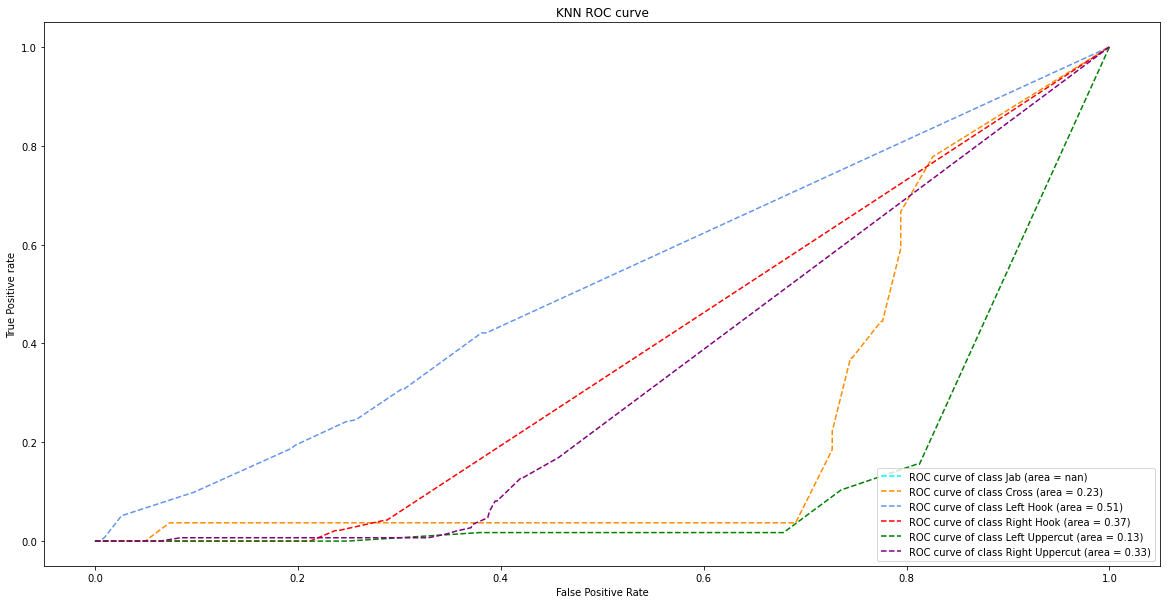

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 18))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()

colors = ['aqua', 'darkorange', 'cornflowerblue','red','green','purple']
classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
n_classes = 6
plt.figure(figsize=(20, 10))
for i in range(n_classes):    
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    thresh[i] = auc(fpr[i], tpr[i])
    
    

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
    
# plotting    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colors[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], thresh[i]))


plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")

## Random Forrest

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3968253968253968

C:\Users\ksoso\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
<ipython-input-32-8b182d1781cb>:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


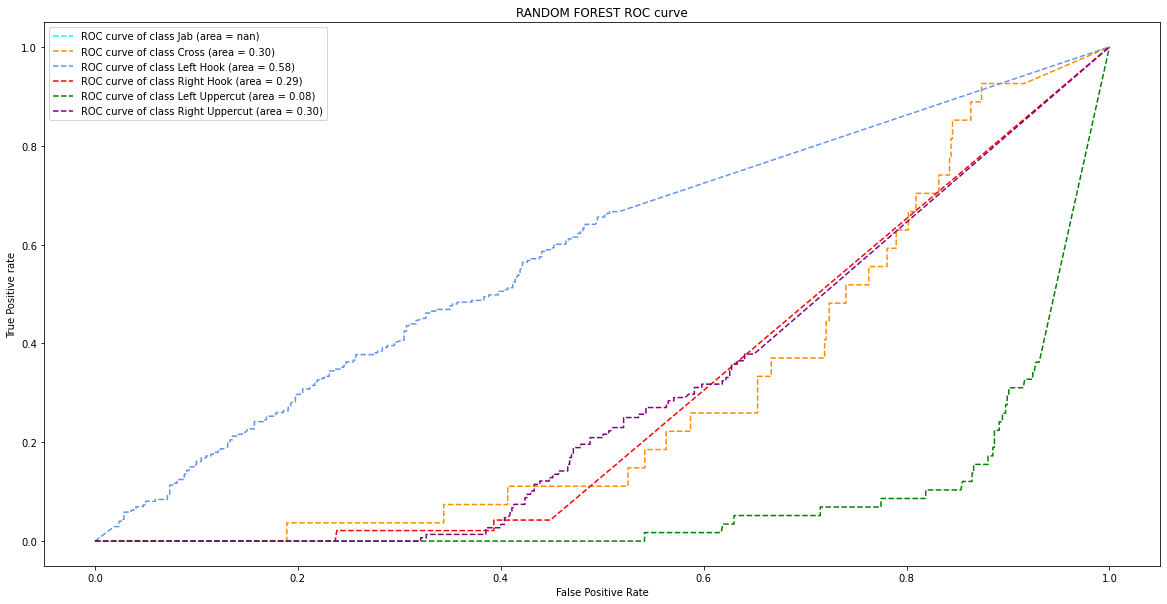

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()

colors = ['aqua', 'darkorange', 'cornflowerblue','red','green','purple']
classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
n_classes = 6
plt.figure(figsize=(20, 10))
for i in range(n_classes):    
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    thresh[i] = auc(fpr[i], tpr[i])
    
    

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
    
# plotting    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=colors[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], thresh[i]))



plt.title('RANDOM FOREST ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="best")

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.89      0.92        27
           2       0.50      0.52      0.51       273
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        58
           5       0.13      0.14      0.13       148
           6       0.60      0.66      0.63       140

    accuracy                           0.40       693
   macro avg       0.36      0.37      0.37       693
weighted avg       0.38      0.40      0.39       693



In [34]:
print(confusion_matrix(y_test, pred))

[[ 24   3   0   0   0   0]
 [  1 143  22   0 103   4]
 [  0  18   0   0  29   0]
 [  0   0   0   0   0  58]
 [  0 114  14   0  20   0]
 [  0  10   0  36   1  93]]


## SVM

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import f1_score

### RBF

In [36]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, probability = True)
rbf.fit(X_train, y_train) #classifier with rbf kernel / gaussian kernel

rbf_pred = rbf.predict(X_test)

#Calculate accuracy and F1 score using the rbf kernel
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  56.57
F1 (RBF Kernel):  43.46


In [37]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           1       1.00      0.26      0.41        27
           2       0.53      0.98      0.69       273
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00       148
           6       0.64      0.84      0.73       140

    accuracy                           0.57       693
   macro avg       0.36      0.35      0.30       693
weighted avg       0.38      0.57      0.43       693



C:\Users\ksoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(confusion_matrix(y_test, rbf_pred))

[[  7  18   0   0   0   2]
 [  0 268   0   0   0   5]
 [  0  46   0   0   0   1]
 [  0   2   0   0   0  56]
 [  0 147   0   0   0   1]
 [  0  23   0   0   0 117]]


### POLY

In [39]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train) #classifier with polynomial kernel

poly_pred = poly.predict(X_test) 

#Calculate accuracy and F1 score using the polynomial kernel
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  55.12
F1 (Polynomial Kernel):  42.46


In [40]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        27
           2       0.52      0.99      0.68       273
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00       148
           6       0.63      0.73      0.68       140

    accuracy                           0.55       693
   macro avg       0.36      0.34      0.31       693
weighted avg       0.37      0.55      0.42       693



C:\Users\ksoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(confusion_matrix(y_test, poly_pred)) 

[[  9  14   0   0   0   4]
 [  0 271   0   0   0   2]
 [  0  46   0   0   0   1]
 [  0   9   0   0   0  49]
 [  0 145   0   0   0   3]
 [  0  38   0   0   0 102]]


### SIGMOID 

In [42]:
sig = svm.SVC(kernel='sigmoid', C=1).fit(X_train, y_train) #classifier with sigmoid kernel
sig_pred = sig.predict(X_test)
#Calculate accuracy and F1 score using the sigmoid kernel
sig_accuracy = accuracy_score(y_test, sig_pred)
sig_f1 = f1_score(y_test, sig_pred, average='weighted')
print('Accuracy (SIG Kernel): ', "%.2f" % (sig_accuracy*100))
print('F1 (SIG Kernel): ', "%.2f" % (sig_f1*100))

Accuracy (SIG Kernel):  37.37
F1 (SIG Kernel):  35.29


In [43]:
print(classification_report(y_test, sig_pred))

              precision    recall  f1-score   support

           1       0.12      0.07      0.09        27
           2       0.44      0.60      0.51       273
           3       0.04      0.04      0.04        47
           4       0.17      0.12      0.14        58
           5       0.34      0.17      0.23       148
           6       0.43      0.42      0.43       140

    accuracy                           0.37       693
   macro avg       0.26      0.24      0.24       693
weighted avg       0.35      0.37      0.35       693



In [44]:
print(confusion_matrix(y_test, sig_pred)) 

[[  2  15   1   1   3   5]
 [  7 164  33   1  33  35]
 [  0  36   2   0   8   1]
 [  0  19   0   7   3  29]
 [  6  86  17   6  25   8]
 [  1  51   1  26   2  59]]


### LINEAR

In [45]:
linear = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) #classifier with linear kernel 

linear_pred = linear.predict(X_test)

#Calculate accuracy and F1 score using the linear kernel
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Linear Kernel):  52.24
F1 (Linear Kernel):  38.99


In [46]:
print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.51      0.93      0.66       273
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00       148
           6       0.56      0.77      0.65       140

    accuracy                           0.52       693
   macro avg       0.18      0.28      0.22       693
weighted avg       0.31      0.52      0.39       693



C:\Users\ksoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(confusion_matrix(y_test, linear_pred)) 

[[  0  22   0   0   0   5]
 [  0 254   0   0   0  19]
 [  0  47   0   0   0   0]
 [  0   4   0   0   0  54]
 [  0 140   0   0   0   8]
 [  0  32   0   0   0 108]]


### ROC CURVE GRAPHS FOR SVM

In [48]:
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

#from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle


y = label_binarize(y, classes=[1,2,3,4,5,6])
n_classes = 6

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

#### RBF ROC CURVE

In [49]:
# classifier
clf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state= 50))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [50]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-51-4d6cce77f220>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


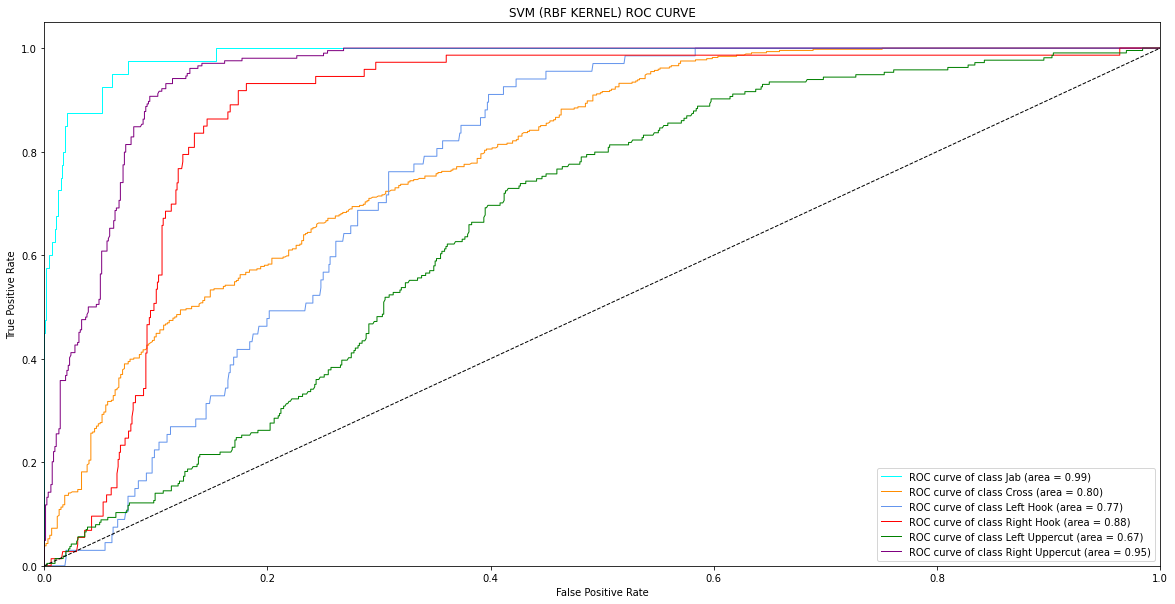

In [51]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize=(20, 10))

classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (RBF KERNEL) ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### POLY ROC CURVE

In [52]:
# classifier
clf_poly = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True, random_state= 101))
y_score = clf_poly.fit(X_train, y_train).decision_function(X_test)

In [53]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-54-cccae9a1c152>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


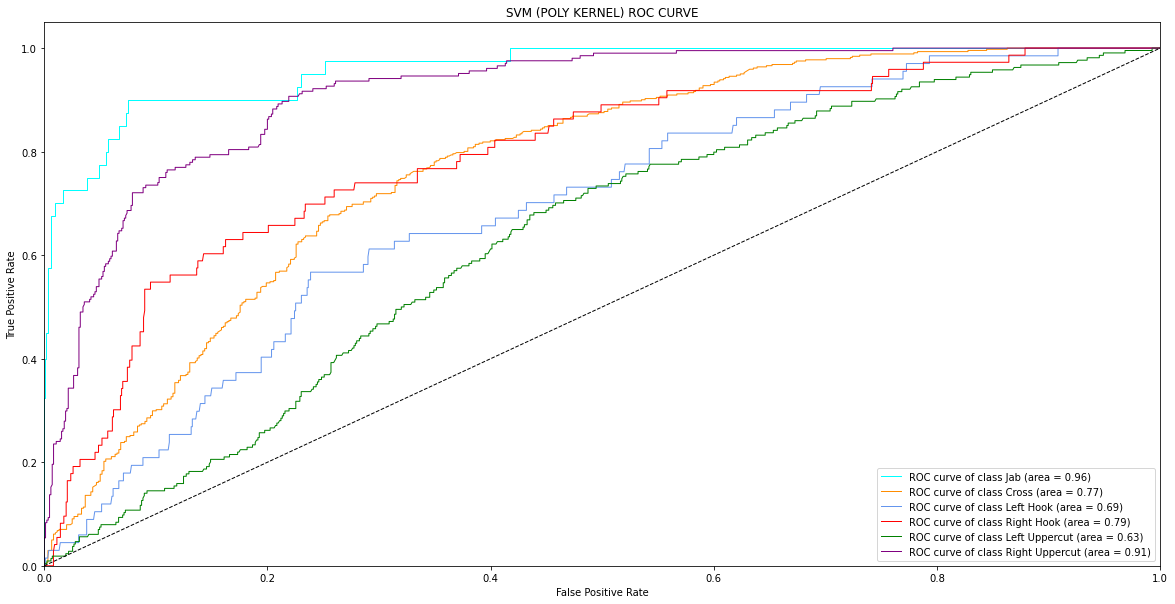

In [54]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize=(20, 10))


classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (POLY KERNEL) ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### SIGMOID ROC CURVE

In [55]:
# classifier
clf_sig = OneVsRestClassifier(svm.SVC(kernel='sigmoid', probability=True, random_state= 101))
y_score = clf_sig.fit(X_train, y_train).decision_function(X_test)

In [56]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-57-57f539643a3f>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


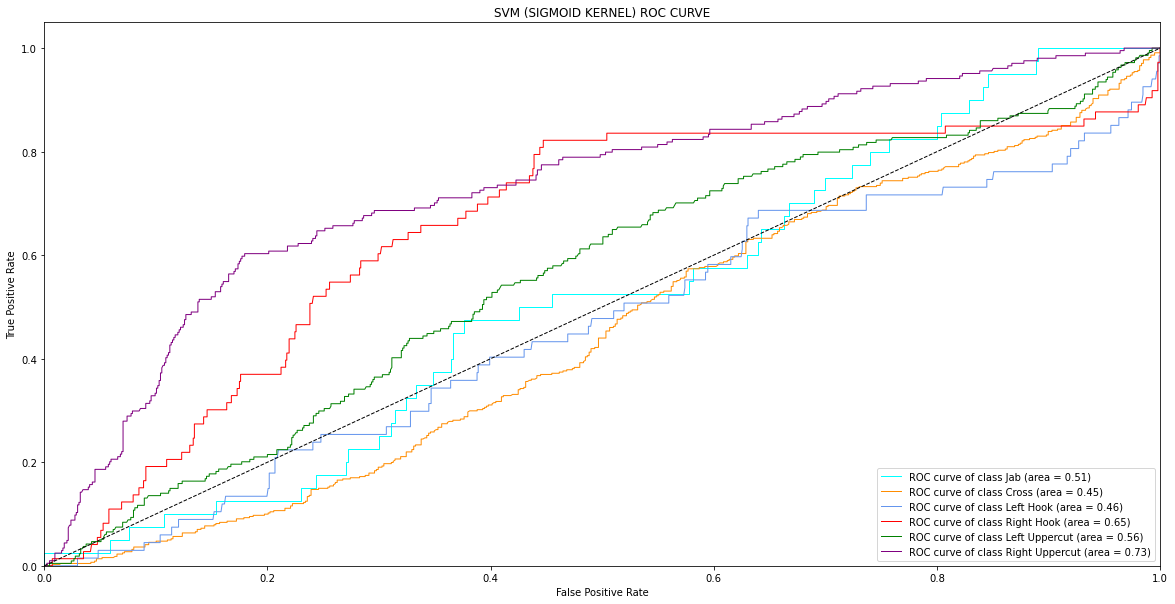

In [57]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize=(20, 10))


classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (SIGMOID KERNEL) ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#### LINEAR ROC CURVE

In [58]:
# classifier
clf_linear = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state= 101))
y_score = clf_linear.fit(X_train, y_train).decision_function(X_test)

In [59]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-60-8f093c5d72cb>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


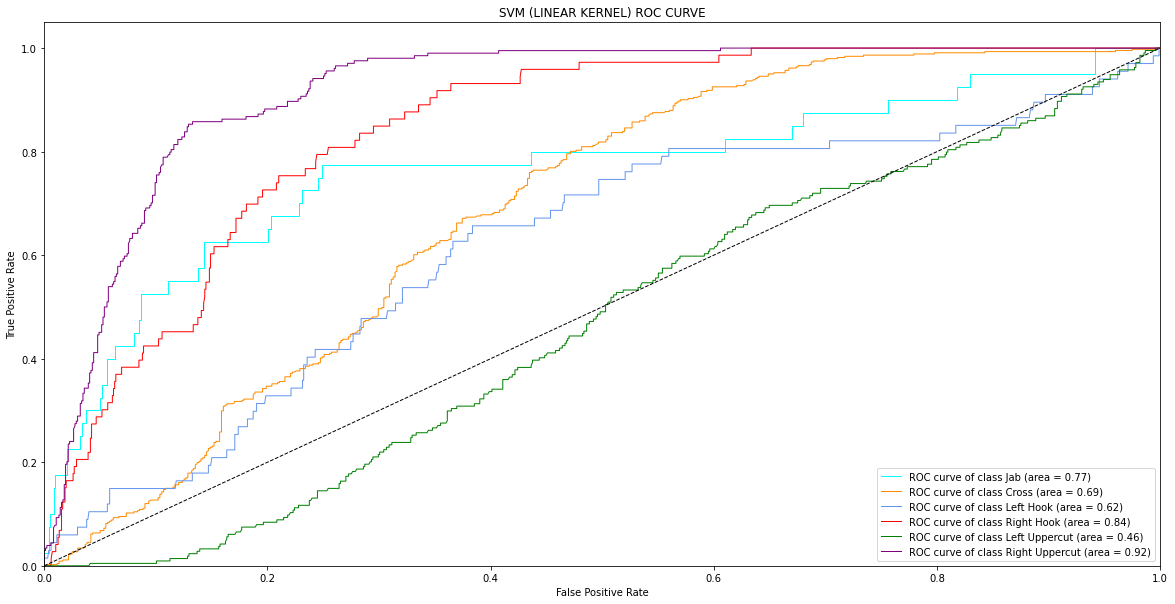

In [60]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize=(20, 10))


classes = ["Jab","Cross","Left Hook","Right Hook","Left Uppercut","Right Uppercut"]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM (LINEAR KERNEL) ROC CURVE')
plt.legend(loc="lower right")
plt.show()